## Import Data

In [1]:
import numpy as np
#import imdb 
import pandas as pd
#from error_generator import Explicit_Missing_Value
#from error_generator import Implicit_Missing_Value
#from error_generator import White_Noise
#from error_generator import Gaussian_Noise
from error_generator import Random_Active_Domain
from error_generator import Similar_Based_Active_Domain
from error_generator import Typo_Keyboard
from error_generator import Typo_Butterfingers
from error_generator import Word2vec_Nearest_Neighbor
from error_generator import Value_Selector
from error_generator import List_selected
from error_generator import Read_Write
from error_generator import Error_Generator
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

anime_data = pd.read_csv("../../new_anime_data1.csv", index_col=0)

anime_data['episodes'] = anime_data['episodes'].replace('Unknown', np.nan)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/chainer-6.0.0b2-py3.7.egg/chainer/_environment_check.py:40: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  ''')  # NOQA


## Cleaning

In [2]:
l1 = []
l2 = []
l3 = []



anime_data['genre'].fillna('',  inplace=True)
anime_data['overview'].fillna('',  inplace=True)
anime_data['type'].fillna('',  inplace=True)
for index, row in anime_data.iterrows():
    item = row['genre']
    if(pd.isnull(item)):
            item =""
    else:
        if isinstance(item, (list, tuple)):
            item = ','.join(item)
        else:
            item = item.replace(" ","")
            item = item.replace("[","")
            item = item.replace("]","")
            item = item.replace("'","")
    l1.append(item) 
      

for index, row in anime_data.iterrows():
    item = row['overview']
    if(pd.isnull(row['overview'])):
            item = ""
    else:
       # for item in anime_data['overview']:
            if isinstance(item, (list, tuple)):
                item = ','.join(item)
            else:
                item = item.replace("[","")
                item = item.replace("]","")
    l2.append(item) 

for index, row in anime_data.iterrows():
    item = row['type']
    if(pd.isnull(row['type'])):
        row['type'] = np.nan
    elif float(row['episodes']) != 1:
            row['type'] = "tv series"
    else:
            row['type'] = "movie"
    l3.append(row['type'])   

    
anime_data['genre'] = l1   
anime_data['overview'] = l2
anime_data['type'] = l3

#drop dublicate
anime_data.drop_duplicates(inplace = True)



## Sampling

In [3]:
anime_train, anime_test = train_test_split(anime_data, test_size=0.2)
anime_test.to_csv("testDataset.csv", index = False,
                  columns = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])
anime_train.to_csv("TrainDataset.csv", index = False,
                  columns = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])


## Generating Errors

In [4]:
import random
def error_generator(dataset, n):
    df=dataset.sample(n)
    print(df.loc[df.type == "tv series", 'type'].count())
    print(df.loc[df.type == "movie", 'type'].count())
    print(df.loc[df.type == "", 'type'].count())
    
    df_movie = df.loc[df.type == "movie"]
    for i, row in df_movie.iterrows():
        if row['type'] =="movie":
            df_movie.at[i,'type']= random.choice(['tv series',''])
            
    df_tv = df.loc[df.type == "tv series"]
    for i, row in df_tv.iterrows():
        if row['type'] =="tv series":
            df_tv.at[i,'type']= random.choice(['movie','']) 
            
    df_empty = df.loc[df.type == ""]
    for i, row in df_empty.iterrows():
        if row['type'] =="":
            df_empty.at[i,'type']= random.choice(['tv series','movie'])      

    
    df.update(df_movie.type)
    df.update(df_tv.type)
    df.update(df_empty.type)
    print(df.loc[df.type == "tv series", 'type'].count())
    print(df.loc[df.type == "movie", 'type'].count())
    print(df.loc[df.type == "", 'type'].count())
    
    dataset.update(df.type)
    return dataset

In [5]:
anime_train = error_generator(anime_train,0)
anime_train.to_csv("/Users/sezin/PycharmProjects/dsa-DC4ML/Error Detection & Repair/Random Active Domain/TrainDataset.csv", index = False,
                  columns = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])

0
0
0
0
0
0


In [6]:
"""def error_generater(dataset, method, n, ignored_columns):

    myselector=List_selected()

    mygen=Error_Generator()

    new_dataset=mygen.error_generator(method_gen=method,selector=myselector,percentage=n,dataset=dataset,mute_column = ignored_columns)
    
    return new_dataset"""

'def error_generater(dataset, method, n, ignored_columns):\n\n    myselector=List_selected()\n\n    mygen=Error_Generator()\n\n    new_dataset=mygen.error_generator(method_gen=method,selector=myselector,percentage=n,dataset=dataset,mute_column = ignored_columns)\n    \n    return new_dataset'

In [7]:
"""# generate error in the training set
new_dataset = error_generater(anime_train.values.tolist(), Random_Active_Domain(),75, ignored_columns = [0,1,2,4,5,6,7])
Read_Write.write_csv_dataset("./{}.csv".format(Random_Active_Domain().name), new_dataset)
anime_train = pd.read_csv("./{}.csv".format(Random_Active_Domain().name), 
                            names = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])
anime_train.to_csv("dirtyTrainDataset.csv", index = False,
                  columns = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])"""

'# generate error in the training set\nnew_dataset = error_generater(anime_train.values.tolist(), Random_Active_Domain(),75, ignored_columns = [0,1,2,4,5,6,7])\nRead_Write.write_csv_dataset("./{}.csv".format(Random_Active_Domain().name), new_dataset)\nanime_train = pd.read_csv("./{}.csv".format(Random_Active_Domain().name), \n                            names = [\'anime_id\', \'name\',\'genre\',\'type\', \'episodes\',\'rating\', \'members\', \'overview\'])\nanime_train.to_csv("dirtyTrainDataset.csv", index = False,\n                  columns = [\'anime_id\', \'name\',\'genre\',\'type\', \'episodes\',\'rating\', \'members\', \'overview\'])'

## Transformation

In [8]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
def get_words(x):
    bagofwords=[]
    for i in x:
        if i[1]=='NN':
            bagofwords.append(i[0])
        elif i[1]=='NNS':
            bagofwords.append(i[0])
        elif i[1]=='NNP':
            bagofwords.append(i[0])
        elif i[1]=='NNPS':
            bagofwords.append(i[0])
        elif i[1]=='JJ':
            bagofwords.append(i[0])
        elif i[1]=='JJR':
            bagofwords.append(i[0])
        elif i[1]=='JJS':
            bagofwords.append(i[0])
        elif i[1]=='RB':
            bagofwords.append(i[0])
        elif i[1]=='RBR':
            bagofwords.append(i[0])
        elif i[1]=='RBS':
            bagofwords.append(i[0])
    return bagofwords

def clean_words(x):
    b=nltk.pos_tag(nltk.word_tokenize(x))
    result=get_words(b)
    return result

In [9]:
def get_dummies(train_data_set, test_data_set):
    train_dummies = train_data_set.genre.str.get_dummies(',')
    test_dummies = test_data_set.genre.str.get_dummies(',')
    
    #print("Train Dummies",train_dummies.shape)    
    #print("Test Dummies",test_dummies.shape)
    
    #### ALİGN
    train_dummies, test_dummies = train_dummies.align(test_dummies, axis=1, join='left')
    
    test_dummies.fillna(0, inplace=True)
    
    type_lb = LabelBinarizer()
    fitted_type_lb = type_lb.fit(train_data_set.type.values)
    X_train = type_lb.transform(train_data_set.type.values)
    X_test  = type_lb.transform(test_data_set.type.values)
    
    dfOneHot_train = pd.DataFrame(X_train, columns = ["movie/TVseries" for i in range(X_train.shape[1])])
    dfOneHot_test  = pd.DataFrame(X_test,  columns = ["movie/TVseries" for i in range(X_test.shape[1])])
    
     # Reset index to enable concat
    train_data_set.reset_index(inplace=True)
    dfOneHot_train.reset_index(inplace=True)
    train_dummies.reset_index(inplace=True)
    
    test_data_set.reset_index(inplace=True)
    dfOneHot_test.reset_index(inplace=True)
    test_dummies.reset_index(inplace=True)
    
    train_data_set = pd.concat([train_data_set, dfOneHot_train], axis=1, join="inner")
    train_data_set = pd.concat([train_data_set, train_dummies ], axis=1, join="inner")

    test_data_set = pd.concat([test_data_set, dfOneHot_test], axis=1)
    test_data_set = pd.concat([test_data_set, test_dummies],  axis=1)
    
    test_data_set['movie/TVseries'].fillna(0, inplace=True)
    train_data_set['movie/TVseries'].fillna(0, inplace=True)

    return ([train_data_set, test_data_set])

def feature_transformation(train_data_set, test_data_set):
    
    dummieset = get_dummies(train_data_set, test_data_set)
    train_data_set = dummieset[0]
    test_data_set = dummieset[1]
        
    #Bag of Words
    summary_doc_train = train_data_set['overview'].fillna("").map(clean_words)
    summary_doc_train =summary_doc_train.apply(','.join)
    
    summary_doc_test = test_data_set['overview'].fillna("").map(clean_words)
    summary_doc_test =summary_doc_test.apply(','.join)
 
    vectorizer = TfidfVectorizer()
    fitted_vectorizer = vectorizer.fit(summary_doc_train)
    overview_feature_train = fitted_vectorizer.transform(summary_doc_train).toarray()
    overview_feature_test = fitted_vectorizer.transform(summary_doc_test).toarray()

    df_train = pd.DataFrame(overview_feature_train, columns = ["word"+ str(int(i)) for i in range(overview_feature_train.shape[1])])
    train_data_set = pd.concat([train_data_set, df_train], axis=1)
    
    df_test = pd.DataFrame(overview_feature_test, columns = ["word"+ str(int(i)) for i in range(overview_feature_test.shape[1])])
    test_data_set = pd.concat([test_data_set, df_test], axis=1)
    
    train_data_set = train_data_set.drop(columns=['anime_id', 'name', 'genre', 'overview', 'type'])
    test_data_set = test_data_set.drop(columns=['anime_id', 'name', 'genre', 'overview', 'type'])
    
    #drop NaN values
    train_data_set.dropna(inplace=True)
    test_data_set.dropna(inplace=True)
    
    train_data_set.fillna(0, inplace=True)
    test_data_set.fillna(0, inplace=True)
    
    return ([train_data_set, test_data_set])


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

'''
anime_train = feature_transformation(anime_train)
anime_test = feature_transformation(anime_test)
'''
transformed_features = feature_transformation(anime_train, anime_test)

anime_train = transformed_features[0]
anime_test = transformed_features[1]

In [11]:
#anime_train = anime_train.dropna()
print(anime_train.shape)
print(anime_test.shape)

(1547, 7311)
(384, 7311)


In [12]:
anime_y_train = anime_train['rating']
anime_X_train = anime_train.drop(columns=['rating'])

anime_y_test = anime_test['rating']
anime_X_test = anime_test.drop(columns=['rating'])


## Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

selector = SelectKBest(score_func=f_regression,k=700)#anime_X_test.shape[1]-1)
features = selector.fit(anime_X_train, anime_y_train)

feature_names = anime_X_train.columns[features.get_support()]
print(feature_names)

# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)

print(anime_X_train.shape)
print(anime_X_test.shape)


anime_X_train = features.transform(anime_X_train)
anime_X_test = features.transform(anime_X_test)
print(anime_X_train.shape)
print(anime_X_test.shape)

anime_X_train = pd.DataFrame(data=anime_X_train, columns=feature_names)
anime_X_test = pd.DataFrame(data=anime_X_test, columns=feature_names)

scaler = StandardScaler() 

# Apply transform to both the training set and the test set.
anime_X_train = scaler.fit_transform(anime_X_train)  
anime_X_test = scaler.transform(anime_X_test) 

anime_X_train = pd.DataFrame(data=anime_X_train, columns=feature_names)
anime_X_test = pd.DataFrame(data=anime_X_test, columns=feature_names)

Index(['index', 'episodes', 'members', 'index', 'movie/TVseries', 'index',
       'Family', 'Talk-Show', 'Yuri', 'word1',
       ...
       'word7181', 'word7191', 'word7203', 'word7207', 'word7209', 'word7210',
       'word7215', 'word7232', 'word7245', 'word7246'],
      dtype='object', length=700)
(1547, 7310)
(384, 7310)
(1547, 700)
(384, 700)


## Training - Testing - Evaluation

In [14]:
def training(model, dataset, label):
    clf = model
    clf.fit(dataset, label)
    return clf

def testing_evaluation(model, testset):
    # Make predictions using the testing set
    anime_y_pred = model.predict(testset)
    
    # The mean squared error
    print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(anime_y_test, anime_y_pred)))
    
    visualizer = PredictionError(model)
    visualizer.fit(anime_X_train, anime_y_train)  # Fit the training data to the visualizer
    visualizer.score(anime_X_test, anime_y_test)  # Evaluate the model on the test data
    g = visualizer.poof() 
    
    plt.plot(anime_y_test, '--g', anime_y_pred, '--b')

### Linear Regression

Mean squared error: 9850464656220.57


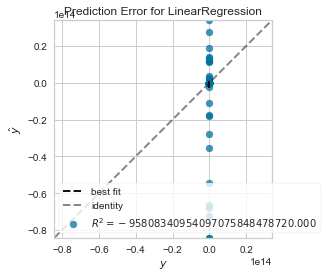

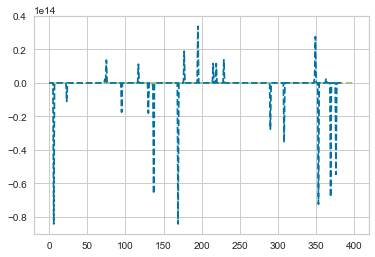

In [15]:
clf = training(model = linear_model.LinearRegression(), dataset = anime_X_train, label= anime_y_train)
testing_evaluation(clf, anime_X_test)

### Lesso Regression

Mean squared error: 1.01


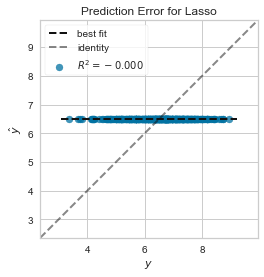

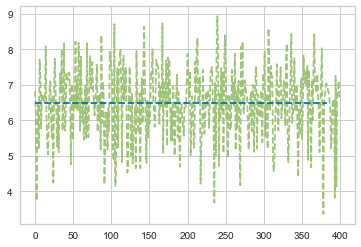

In [16]:
clf = training(model = linear_model.Lasso(), dataset = anime_X_train, label= anime_y_train)
testing_evaluation(clf, anime_X_test)

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(anime_X_train, anime_y_train);

In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(anime_X_test)
# Calculate the absolute errors
errors = abs(predictions - anime_y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / anime_y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.18 degrees.
Accuracy: 96.84 %.


### Cross Validation

In [19]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
scores = cross_val_score(clf, anime_X_train, anime_y_train, scoring="neg_mean_squared_error", cv=5) 
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [1.052 0.986 1.015 0.958 1.026]
Mean: 1.007583039097102
Standard deviation: 0.032458622364523994


### Grid Search For Hyper Parameter Selection

In [20]:
def checkHP(model, folds, dataset, label):
    parameters = {'n_estimators': [100, 250, 500],
                  'min_samples_split': [2,],
                  'min_samples_leaf': [3,],
                  'max_depth': [3, 5, 7, 10, 12],
                  'max_features': ['auto',],
                  'oob_score':[True]
    }

    gd_sr = GridSearchCV(estimator=model,  
                         param_grid=parameters,
                         scoring="neg_mean_squared_error",
                         cv=folds, verbose=1, n_jobs=-1)

    gd_sr.fit(dataset, label)  
    
    best_parameters = gd_sr.best_params_  
    print("best parameters are: ", best_parameters)

    best_result = gd_sr.best_score_  
    print("The mean squared Error is: %.2f" % -best_result)
    
    return gd_sr.best_estimator_

from sklearn.ensemble import RandomForestRegressor
model = checkHP(RandomForestRegressor(), 5, anime_X_train, anime_y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.3min finished


best parameters are:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500, 'oob_score': True}
The mean squared Error is: 0.29


### Retraining

Mean squared error: 0.44


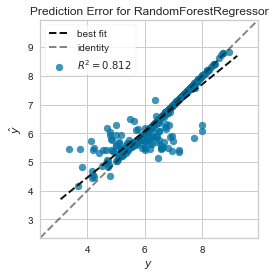

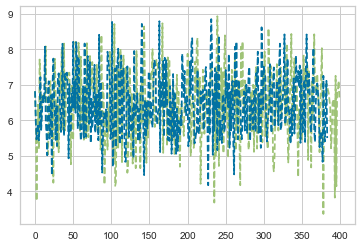

In [21]:
#clf = training(model = linear_model.Lasso(alpha=0.1), dataset = anime_X_train, label= anime_y_train)
testing_evaluation(model, anime_X_test)

In [22]:
#print(model.coef_)

In [23]:
import lime
import lime.lime_tabular
import os

PATH = os.getcwd()
print(PATH)

anime_X_train = pd.DataFrame(data=anime_X_train)
anime_X_test = pd.DataFrame(data=anime_X_test)

explainer = lime.lime_tabular.LimeTabularExplainer(anime_X_train, feature_names=list(anime_X_train), verbose=True, mode='regression', discretize_continuous=False)

exp = explainer.explain_instance(anime_X_test.iloc[6], model.predict, num_features=len(list(anime_X_test)))
exp.show_in_notebook(show_table=True)
exp.save_to_file(PATH+'/model_rf.html')

/Users/sezin/PycharmProjects/dsa-DC4ML/Error Detection & Repair/Random Active Domain
Intercept 6.488414062428304
Prediction_local [5.84]
Right: 5.839756110309946
